## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import copy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from torchmetrics.functional.classification import *

## Read Data

In [17]:
data = pd.read_csv('D:\Project\project-ednn\Code\Final_dataset_Diabetes_Complication.csv')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2


In [18]:
data = data.drop_duplicates(ignore_index=True)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543770,1,1,2,1,1,4,1,1,5,2,...,2,3,1,2,2,2,2,2,2,2
543771,2,1,1,1,1,4,1,1,5,1,...,1,2,2,2,2,1,2,2,2,1
543772,1,2,1,1,1,3,1,1,2,1,...,1,3,1,2,2,2,2,2,2,1
543773,3,1,2,1,1,3,1,1,2,2,...,1,3,2,2,2,2,2,1,2,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543775 entries, 0 to 543774
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   X1      543775 non-null  int64
 1   X2      543775 non-null  int64
 2   X3      543775 non-null  int64
 3   X4      543775 non-null  int64
 4   X5      543775 non-null  int64
 5   X6      543775 non-null  int64
 6   X7      543775 non-null  int64
 7   X8      543775 non-null  int64
 8   X9      543775 non-null  int64
 9   X10     543775 non-null  int64
 10  X11     543775 non-null  int64
 11  X12     543775 non-null  int64
 12  X13     543775 non-null  int64
 13  X14     543775 non-null  int64
 14  X15     543775 non-null  int64
 15  X16     543775 non-null  int64
 16  X17     543775 non-null  int64
 17  X18     543775 non-null  int64
 18  X19     543775 non-null  int64
 19  X20     543775 non-null  int64
 20  X21     543775 non-null  int64
 21  X22     543775 non-null  int64
 22  X23     543775 non-n

## Data Visualization

KeyboardInterrupt: 

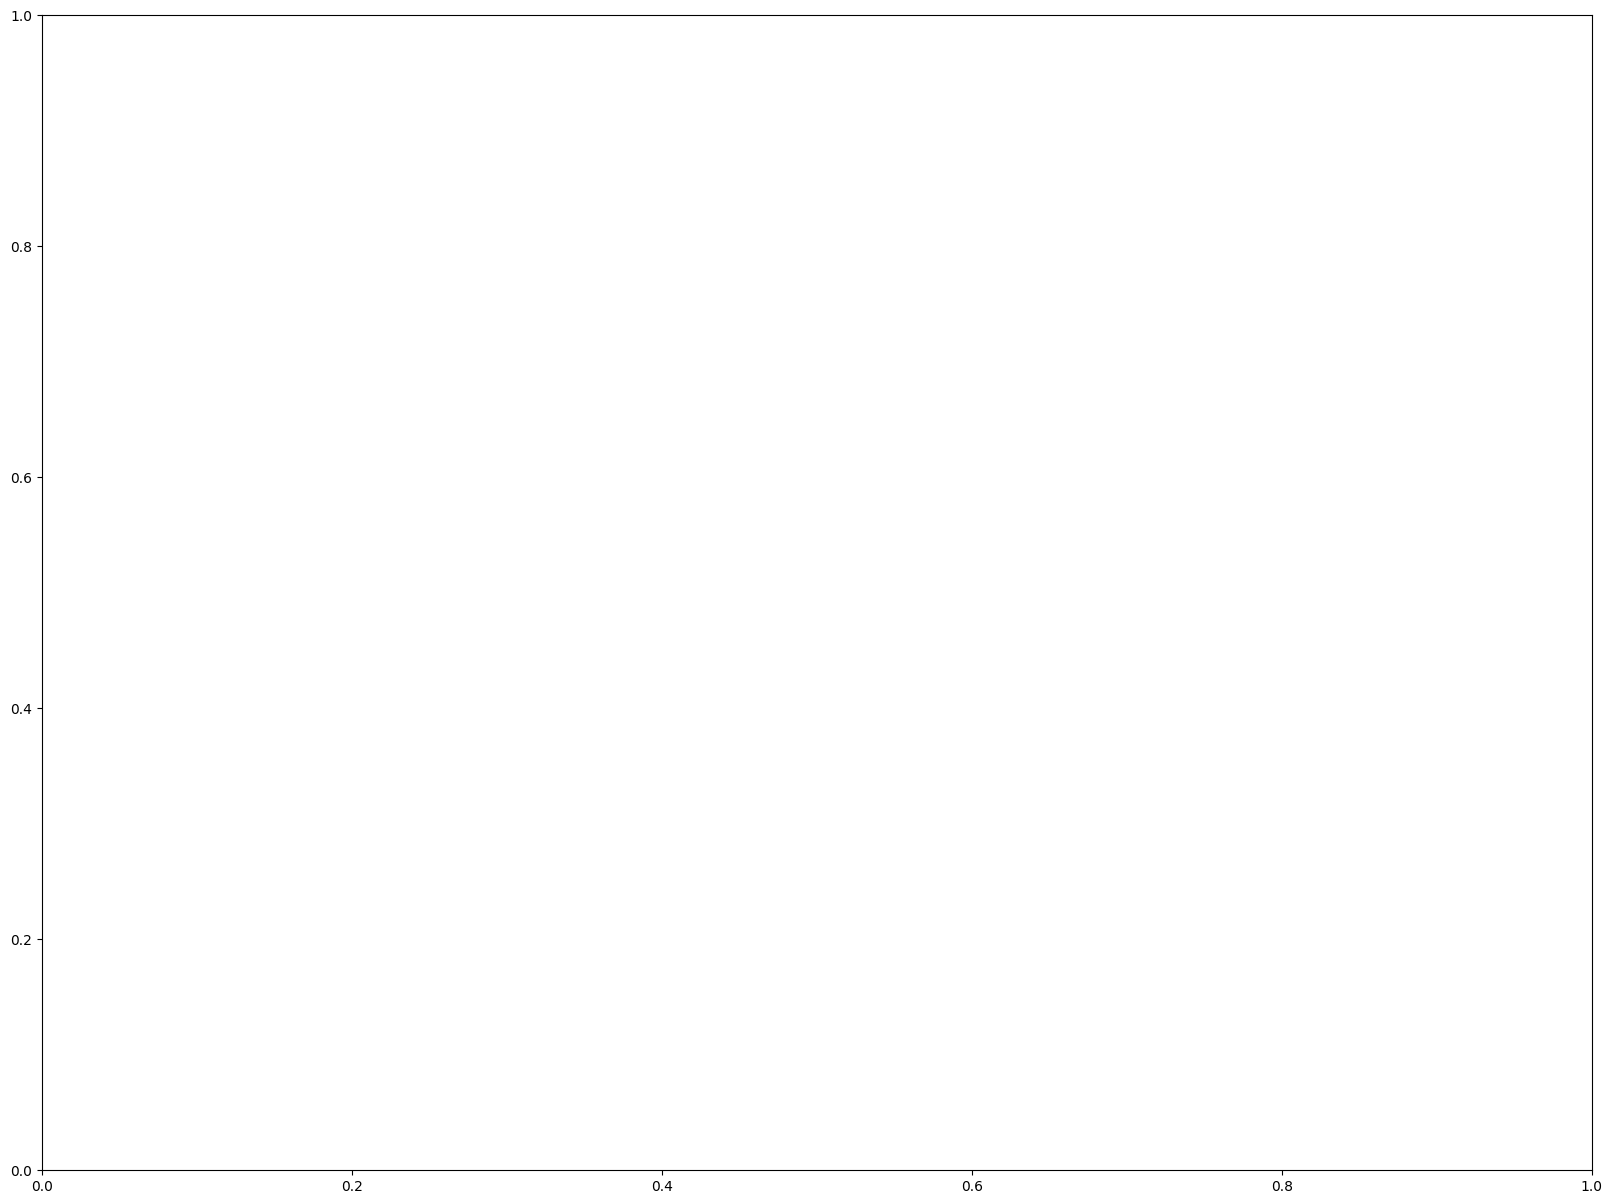

In [20]:
f, ax = plt.subplots(figsize= [20,15])
corr = data.corr()
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "rainbow" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
data_feature = data.iloc[:, :26]
data_label = data.iloc[:, 26:]
data_label

,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,2,2,1,2,2,1,2
1,2,2,2,2,2,1,1
2,2,2,2,2,2,2,1
3,2,2,2,1,2,1,2
4,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
543770,2,2,2,2,2,2,2
543771,2,2,1,2,2,2,1
543772,2,2,2,2,2,2,1
543773,2,2,2,2,1,2,2


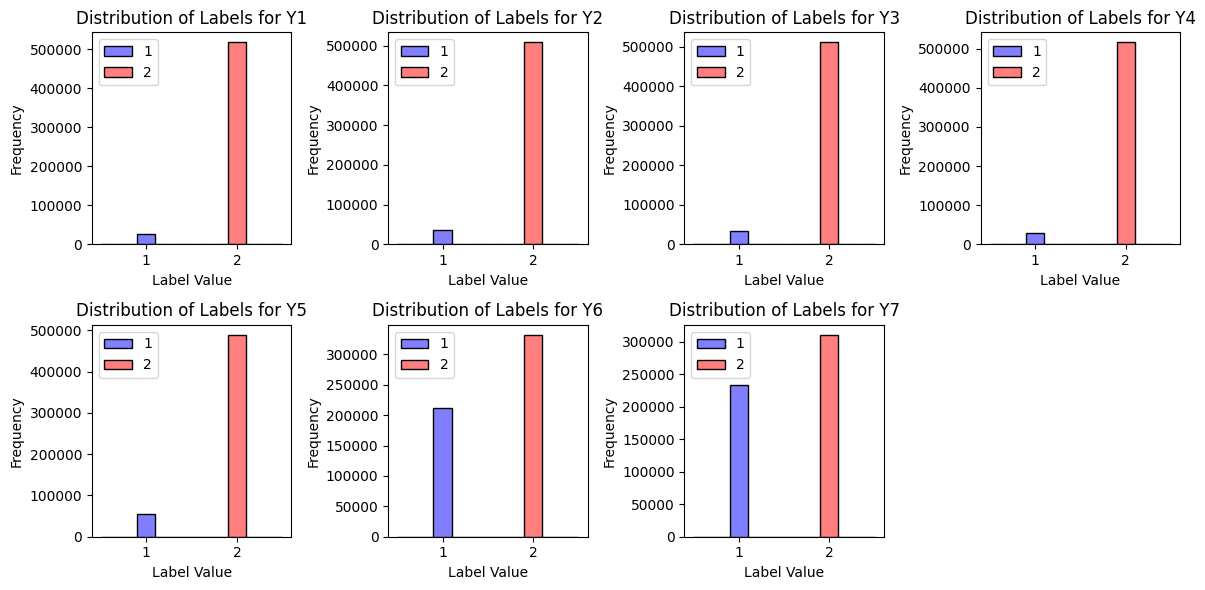

In [ ]:
num_rows = 2  # Adjust as needed
num_cols = 4  # Adjust as needed

# Loop through each label column and create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
for i, label in enumerate(data_label.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    # Filter values 1 and 2 from the label column
    values_1 = data_label[label][data_label[label] == 1]
    values_2 = data_label[label][data_label[label] == 2]

    # Create a histogram or bar plot on the current subplot
    sns.histplot(values_1, bins=5, color='blue', alpha=0.5, label='1', ax=ax)
    sns.histplot(values_2, bins=5, color='red', alpha=0.5, label='2', ax=ax)

    ax.set_title(f'Distribution of Labels for {label}')
    ax.set_xlabel('Label Value')
    ax.set_ylabel('Frequency')
    ax.legend()

if 7 < num_rows * num_cols:
    for j in range(7, num_rows * num_cols):
        fig.delaxes(axes.ravel()[j])

# Ensure tight layout to avoid overlapping
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)

# Transform the DataFrame to obtain the normalized data
data_normalized = scaler.transform(data)

In [ ]:
X = data_normalized[:, :26]
y = data_normalized[:, 26:]

## Cross Validation

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
class CalibratedLabelRanking:
    """Calibratedn Label Ranking
    Reference Paper:
        Min-Ling Zhang and Zhi-Hua Zhou. A Review on Multi-Label Learning Algorithms
        Johannes Fürnkranz. Multilabel classification via calibrated label ranking
    """
    def __init__(self, classifier):
        self.classifier = classifier

    def fit(self, X, y):
        self.virtualLabel = y.shape[1]
        self.label_count = y.shape[1]
        self.m = X.shape[0]
        self.X = X
        self.y = y
        self.realLabelClassifiers = []
        self.virtualLabelClassifiers = []
        self.trainRealLabelClassifiers()
        self.trainVirtualLabelClassifiers()
        return self

    def trainRealLabelClassifiers(self):
        for i in range(self.label_count):
            for j in range(i+1, self.label_count):
                X_subset = []
                y_subset = []
                classifier = copy.deepcopy(self.classifier)
                for k in range(self.m):
                    if self.y[k, i] == self.y[k, j]:
                        continue
                    elif self.y[k, i] == 1:
                        X_subset.append(self.X[k, :])
                        y_subset.append(i)
                    else:
                        X_subset.append(self.X[k, :])
                        y_subset.append(j)
                try:
                    classifier.fit(np.vstack(X_subset), np.array(y_subset))
                except ValueError:
                    if y_subset[0] == i:
                        classifier = i
                    else:
                        classifier = j
                self.realLabelClassifiers.append(classifier)

    def trainVirtualLabelClassifiers(self):
        for i in range(self.label_count):
            classifier = copy.deepcopy(self.classifier)
            y_temp= self.y[:, i]
            y_subset = []
            for j in range(self.m):
                y_subset.append(i if y_temp[j] == 1 else self.virtualLabel)
            classifier.fit(self.X, y_subset)
            self.virtualLabelClassifiers.append(classifier)

    def predict(self, X_pre):
        result = np.zeros((X_pre.shape[0], self.label_count))
        threshold = self.voteForVirtualLabel(X_pre)
        votes = self.voteForRealLabel(X_pre)
        for i in range(X_pre.shape[0]):
            result[i, votes[i,:] > threshold[i]] = 1
        return result

    def voteForVirtualLabel(self, X_pre):
        votes = np.zeros(X_pre.shape[0])
        for i in range(len(self.virtualLabelClassifiers)):
            predict = self.virtualLabelClassifiers[i].predict(X_pre)
            for j in range(X_pre.shape[0]):
                if predict[j] == self.virtualLabel:
                    votes[j] += 1
        return votes

    def voteForRealLabel(self, X_pre):
        votes = np.zeros((X_pre.shape[0], self.label_count))
        for i in range(len(self.realLabelClassifiers)):
            if isinstance(self.realLabelClassifiers[i], int):
                predict = np.array([self.realLabelClassifiers[i]] * X_pre.shape[0])
            else:
                predict = self.realLabelClassifiers[i].predict(X_pre)
            for j in range(X_pre.shape[0]):
                votes[j, predict[j]] += 1
        for j in range(len(self.virtualLabelClassifiers)):
            predict = self.virtualLabelClassifiers[j].predict(X_pre)
            for j in range(X_pre.shape[0]):
                if predict[j] < self.virtualLabel:
                    votes[j, predict[j]] += 1
        return votes
            

In [ ]:
fold_test = []
fold_pred = []

In [ ]:
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    x_train, x_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    classifier = CalibratedLabelRanking(classifier=KNeighborsClassifier())
    
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    fold_test.append(y_test)
    fold_pred.append(prediction)

    accuracy = accuracy_score(y_test, prediction)
    print(f'Fold: {fold+1} | Accuracy: {accuracy}')  

Fold: 1 | Accuracy: 0.35711133178859095
Fold: 2 | Accuracy: 0.3554746404796057
Fold: 3 | Accuracy: 0.3586744639376218
Fold: 4 | Accuracy: 0.35288168009121335
Fold: 5 | Accuracy: 0.35749751737835156
Fold: 6 | Accuracy: 0.35866266987880907
Fold: 7 | Accuracy: 0.36004192949224856
Fold: 8 | Accuracy: 0.3574673115471615
Fold: 9 | Accuracy: 0.3602442209022197
Fold: 10 | Accuracy: 0.35757765231623667


In [ ]:
model_name = 'knn'
saved_test = np.array(fold_test)
saved_pred = np.array(fold_pred)
np.save(f'Results/{model_name}_fold_test.npy', saved_test)
np.save(f'Results/_fold_pred.npy', saved_test)

In [ ]:
for i in range(10):
    trues = torch.tensor(fold_test[i])
    preds = torch.tensor(fold_pred[i])
    print(f'Fold: {i+1}')
    print(f"Accuracy (Micro)\t: {multilabel_accuracy(preds, trues, num_labels=7, average='micro').item():.5f}")
    print(f"Accuracy (Macro)\t: {multilabel_accuracy(preds, trues, num_labels=7, average='macro').item():.5f}")
    print(f"Precision (Micro)\t: {multilabel_precision(preds, trues, num_labels=7, average='micro').item():.5f}")
    print(f"Precision (Macro)\t: {multilabel_precision(preds, trues, num_labels=7, average='macro').item():.5f}")
    print(f"Recall (Micro)\t\t: {multilabel_recall(preds, trues, num_labels=7, average='micro').item():.5f}")
    print(f"Recall (Macro)\t\t: {multilabel_recall(preds, trues, num_labels=7, average='macro').item():.5f}")
    print(f"F1 Score (Micro)\t: {multilabel_f1_score(preds, trues, num_labels=7, average='micro').item():.5f}")
    print(f"F1 Score (Macro)\t: {multilabel_f1_score(preds, trues, num_labels=7, average='macro').item():.5f}")
    print(f"AUC ROC (Micro)\t\t: {multilabel_auroc(preds, trues.long(), num_labels=7, average='micro').item():.5f}")
    print(f"AUC ROC (Macro)\t\t: {multilabel_auroc(preds, trues.long(), num_labels=7, average='macro').item():.5f}")
    print('-'*20)

Fold: 1
Accuracy (Micro)	: 0.85426
Accuracy (Macro)	: 0.85426
Precision (Micro)	: 0.89220
Precision (Macro)	: 0.87278
Recall (Micro)		: 0.93907
Recall (Macro)		: 0.91790
F1 Score (Micro)	: 0.91504
F1 Score (Macro)	: 0.89468
AUC ROC (Micro)		: 0.68097
AUC ROC (Macro)		: 0.55611
--------------------
Fold: 2
Accuracy (Micro)	: 0.85385
Accuracy (Macro)	: 0.85385
Precision (Micro)	: 0.89232
Precision (Macro)	: 0.87287
Recall (Micro)		: 0.93856
Recall (Macro)		: 0.91746
F1 Score (Micro)	: 0.91486
F1 Score (Macro)	: 0.89454
AUC ROC (Micro)		: 0.67938
AUC ROC (Macro)		: 0.55632
--------------------
Fold: 3
Accuracy (Micro)	: 0.85561
Accuracy (Macro)	: 0.85561
Precision (Micro)	: 0.89331
Precision (Macro)	: 0.87388
Recall (Micro)		: 0.93969
Recall (Macro)		: 0.91870
F1 Score (Micro)	: 0.91591
F1 Score (Macro)	: 0.89565
AUC ROC (Micro)		: 0.68200
AUC ROC (Macro)		: 0.55810
--------------------
Fold: 4
Accuracy (Micro)	: 0.85333
Accuracy (Macro)	: 0.85333
Precision (Micro)	: 0.89199
Precision (Ma

In [ ]:
for i in range(10):
    trues = torch.tensor(fold_test[i])
    preds = torch.tensor(fold_pred[i])
    print(f'Fold: {i+1}')
    print(f"Subset Accuracy\t\t: {multilabel_exact_match(preds, trues, num_labels=7).item():.5f}")
    print(f"Hamming Loss\t\t: {multilabel_hamming_distance(preds, trues, num_labels=7).item():.5f}")
    # print('Accuracy Exp:', acc_exp)
    # print('Precision Exp:', prec_exp)
    # print('F1-Score Exp:', f1_exp)
    # print('One Error:', one_error)
    print(f"Coverage\t\t: {multilabel_coverage_error(preds, trues, num_labels=7).item():.5f}")
    print(f"Ranking Loss\t\t: {multilabel_ranking_loss(preds, trues, num_labels=7).item():.5f}")
    print(f"Average Precision\t: {multilabel_average_precision(preds, trues.long(), num_labels=7).item():.5f}")
    print('-'*20)

Fold: 1
Subset Accuracy		: 0.35711
Hamming Loss		: 0.14574
Coverage		: 6.64449
Ranking Loss		: 0.32545
Average Precision	: 0.86356
--------------------
Fold: 2
Subset Accuracy		: 0.35547
Hamming Loss		: 0.14615
Coverage		: 6.64909
Ranking Loss		: 0.32676
Average Precision	: 0.86386
--------------------
Fold: 3
Subset Accuracy		: 0.35867
Hamming Loss		: 0.14439
Coverage		: 6.64421
Ranking Loss		: 0.32373
Average Precision	: 0.86480
--------------------
Fold: 4
Subset Accuracy		: 0.35288
Hamming Loss		: 0.14667
Coverage		: 6.64590
Ranking Loss		: 0.32657
Average Precision	: 0.86290
--------------------
Fold: 5
Subset Accuracy		: 0.35750
Hamming Loss		: 0.14489
Coverage		: 6.64482
Ranking Loss		: 0.32386
Average Precision	: 0.86462
--------------------
Fold: 6
Subset Accuracy		: 0.35866
Hamming Loss		: 0.14450
Coverage		: 6.64641
Ranking Loss		: 0.32481
Average Precision	: 0.86504
--------------------
Fold: 7
Subset Accuracy		: 0.36004
Hamming Loss		: 0.14435
Coverage		: 6.64632
Ranking L